# Rectangular Apertures

Begin by getting the library path

In [1]:
import lib_path

Set the frequency (Hz), the aperture width (m) and the aperture height (m)

In [2]:
frequency = 1e9

width = 0.2

height = 0.3

Set up the angular arrays (radians) using the `linspace` and `meshgrid` routines from `scipy`

In [3]:
from scipy import meshgrid, linspace, finfo

from scipy.constants import pi


n = 200

m = int(n/4)

theta, phi = meshgrid(linspace(finfo(float).eps, 0.5 * pi, n), linspace(finfo(float).eps, 2.0 * pi, n))

Calculate the antenna parameters and antenna patterns for the rectangular uniform aperture in a ground plane or a rectangular uniform aperture in free space or a rectangular aperture with TE10 field distribution 

In [4]:
from Libs.antenna.aperture import rectangular_uniform_ground_plane, rectangular_uniform_free_space, or rectangular_te10_ground_plane


antenna_type = 'rectangular_te10_ground_plane'


if antenna_type == 'rectangular_uniform_ground_plane':

    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = rectangular_uniform_ground_plane.beamwidth(width, height, frequency)

    directivity = rectangular_uniform_ground_plane.directivity(width, height, frequency)

    sidelobe_level_eplane = rectangular_uniform_ground_plane.side_lobe_level()

    sidelobe_level_hplane = sidelobe_level_eplane

    _, et, ep, _, _, _ = rectangular_uniform_ground_plane.far_fields(width, height, frequency, 1e9, theta, phi)
    
    

elif antenna_type == 'rectangular_uniform_free_space':

    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = rectangular_uniform_free_space.beamwidth(width, height, frequency)

    directivity = rectangular_uniform_free_space.directivity(width, height, frequency)

    sidelobe_level_eplane = rectangular_uniform_free_space.side_lobe_level()

    sidelobe_level_hplane = sidelobe_level_eplane

    _, et, ep, _, _, _ = rectangular_uniform_free_space.far_fields(width, height, frequency, 1e9, theta, phi)
            
            

else:

    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = rectangular_te10_ground_plane.beamwidth(width, height, frequency)

    directivity = rectangular_te10_ground_plane.directivity(width, height, frequency)

    sidelobe_level_eplane, sidelobe_level_hplane = rectangular_te10_ground_plane.side_lobe_level()

    _, et, ep, _, _, _ = rectangular_te10_ground_plane.far_fields(width, height, frequency, 1e9, theta, phi)

Display the antenna parameters

In [5]:
print('Sidelobe Level E-plane (dB)  {:.2f}'.format(sidelobe_level_eplane))

print('Sidelobe Level H-plane (dB)  {:.2f}'.format(sidelobe_level_hplane))

print('Directivity  {:.2f}'.format(directivity))

Sidelobe Level E-plane (dB)  -13.26
Sidelobe Level H-plane (dB)  -23.00
Directivity  6.80


Set up the U-V coordinates for displaying the antenna pattern

In [6]:
from scipy import sin, cos, sqrt, amax

uu = sin(theta) * cos(phi)

vv = sin(theta) * sin(phi)

Calculate the normalized electric field magnitude

In [7]:
e_mag = sqrt(abs(et * et + ep * ep))

e_mag /= amax(e_mag)

Create the color plot

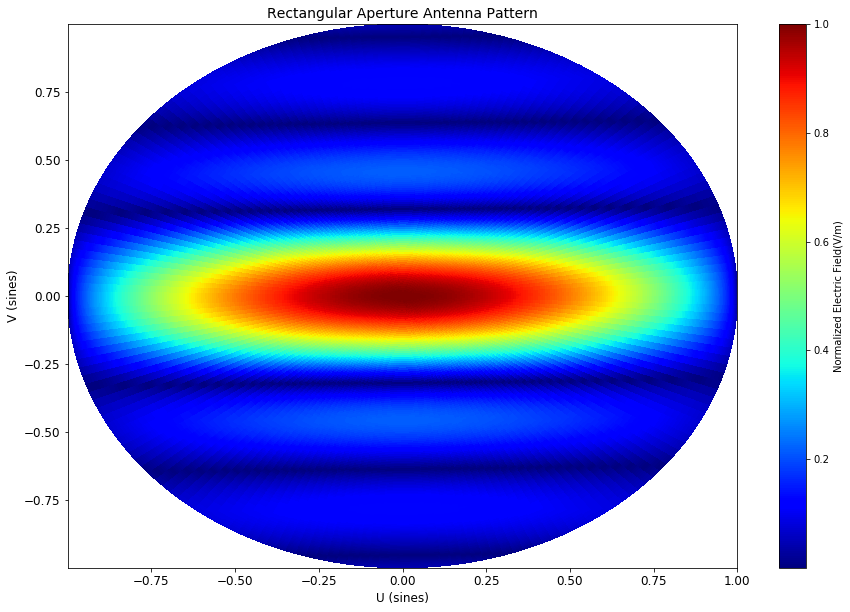

In [11]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Set up the axes

fig, axes1 = plt.subplots()


im = axes1.pcolor(uu, vv, e_mag, cmap="jet")

cbar = fig.colorbar(im, ax=axes1, orientation='vertical')

cbar.set_label("Normalized Electric Field(V/m)")



# Set the x- and y-axis labels

axes1.set_xlabel("U (sines)", size=12)

axes1.set_ylabel("V (sines)", size=12)


# Set the plot title and labels

axes1.set_title('Rectangular Aperture Antenna Pattern', size=14)



# Set the tick label size

axes1.tick_params(labelsize=12)

Create the contour plot

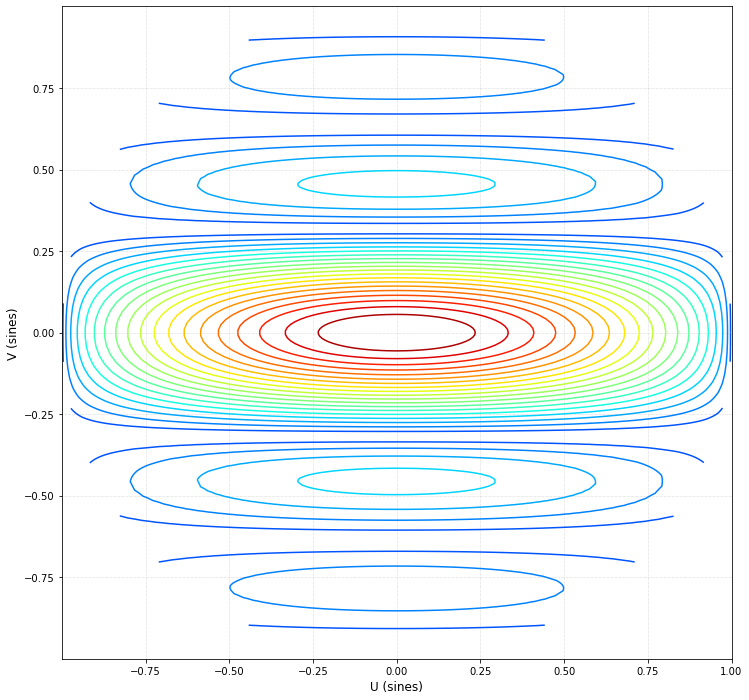

In [9]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 12)



plt.contour(uu, vv, e_mag, 20, cmap="jet", vmin=-0.2, vmax=1.0)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)



# Set the plot title and labels

axes1.set_title('Rectangular Aperture Antenna Pattern', size=14)



# Set the tick label size

axes1.tick_params(labelsize=12)

Create the line plot

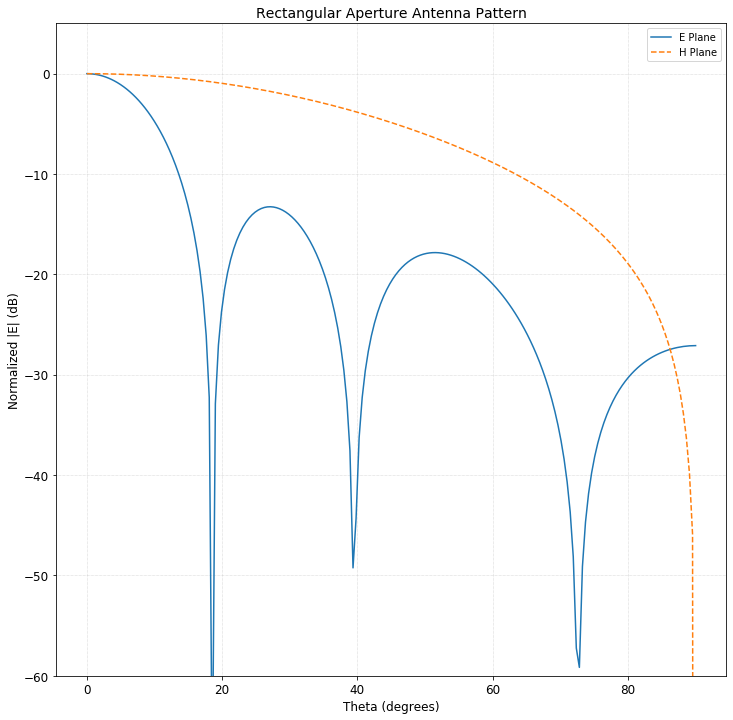

In [10]:
from scipy import degrees, log10


plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[m]), '', label='E Plane')

plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[0]), '--', label='H Plane')



# Set the y axis limit

plt.ylim(-60, 5)



# Set the x and y axis labels

plt.xlabel("Theta (degrees)", size=12)

plt.ylabel("Normalized |E| (dB)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Place the legend

plt.legend(loc='upper right', prop={'size': 10})



# Set the plot title and labels

plt.title('Rectangular Aperture Antenna Pattern', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)